# 1. Combine multiple datasets into a single dataset

In [1]:
import os
import shutil

In [2]:
consonants_src = '/kaggle/input/devanagari-character-dataset/nhcd/nhcd/consonants'
numerals_src = '/kaggle/input/devanagari-character-dataset/nhcd/nhcd/numerals'
vowels_src = '/kaggle/input/devanagari-character-dataset/nhcd/nhcd/vowels'
compound_src_train = '/kaggle/input/self-compounded-devanagari-characters/self_compounded_devanagari_chars/data/train'
compound_src_valid = '/kaggle/input/self-compounded-devanagari-characters/self_compounded_devanagari_chars/data/validation'
data_path = '/kaggle/working/data'

In [3]:
if os.path.exists(data_path):
    shutil.rmtree(data_path)
os.mkdir(data_path)


# copy numerals
for srcroot, srcdirs, srcfiles in os.walk(numerals_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'n_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy vowels
for srcroot, srcdirs, srcfiles in os.walk(vowels_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'v_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy consonants
for srcroot, srcdirs, srcfiles in os.walk(consonants_src):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'c_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy compound training examples
for srcroot, srcdirs, srcfiles in os.walk(compound_src_train):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'j_{srcdirname}') 
        os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

# copy compound validation examples
for srcroot, srcdirs, srcfiles in os.walk(compound_src_valid):
    for srcdirname in srcdirs:
        # create folder for a class
        dstdir_name = os.path.join(data_path, f'j_{srcdirname}') 
        #os.mkdir(dstdir_name)
        # copy files for the class
        for _, _, srcfiles in os.walk(os.path.join(srcroot, srcdirname)):
            for srcfilename in srcfiles:
                shutil.copy(src=os.path.join(srcroot, srcdirname, srcfilename), \
                                dst=os.path.join(dstdir_name))

print('Done')

Done


In [4]:
i=0
for srcroot, srcdirs, srcfiles in os.walk('/kaggle/working/data/n_4'):
    for filename in srcfiles:
        i+=1
        print(filename)
print(f'{i} files')

040_01.jpg
010_06.jpg
030_03.jpg
006_03.jpg
008_07.jpg
044_01.jpg
019_09.jpg
014_10.jpg
042_01.jpg
021_07.jpg
014_04.jpg
013_02.jpg
013_07.jpg
002_14.jpg
005_06.jpg
021_02.jpg
018_03.jpg
008_09.jpg
018_07.jpg
017_08.jpg
017_10.jpg
019_04.jpg
020_04.jpg
017_02.jpg
008_08.jpg
008_02.jpg
004_01.jpg
022_01.jpg
014_06.jpg
023_02.jpg
002_08.jpg
005_05.jpg
016_07.jpg
001_24.jpg
015_08.jpg
001_15.jpg
006_10.jpg
002_03.jpg
028_02.jpg
045_01.jpg
001_22.jpg
010_03.jpg
043_01.jpg
022_07.jpg
012_05.jpg
013_05.jpg
006_06.jpg
001_21.jpg
015_06.jpg
004_05.jpg
041_01.jpg
024_01.jpg
017_07.jpg
013_10.jpg
008_04.jpg
022_04.jpg
008_05.jpg
007_04.jpg
011_07.jpg
018_02.jpg
043_02.jpg
002_06.jpg
011_08.jpg
005_07.jpg
002_01.jpg
015_01.jpg
028_05.jpg
021_04.jpg
027_02.jpg
002_12.jpg
017_05.jpg
010_09.jpg
016_08.jpg
019_05.jpg
014_08.jpg
001_23.jpg
001_17.jpg
016_03.jpg
018_01.jpg
008_06.jpg
014_02.jpg
018_10.jpg
006_09.jpg
014_05.jpg
005_09.jpg
021_06.jpg
045_02.jpg
015_07.jpg
004_08.jpg
005_08.jpg
040_02.jpg

# 2. Create input data piepline

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_img_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_img_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [7]:
train_img_path = "/kaggle/working/data"
num_classes = 77

In [8]:
batch_size = 8
train_gen = train_img_datagen.flow_from_directory(
    directory=train_img_path,
    target_size=(28, 28),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_gen = train_img_datagen.flow_from_directory(
    directory=train_img_path,
    target_size=(28, 28),
    color_mode="grayscale",
    class_mode="categorical",
    subset='validation',
    shuffle=False,
    seed=42
)

Found 13682 images belonging to 77 classes.
Found 3410 images belonging to 77 classes.


# 3. Create model

In [9]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import plot_model
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
def create_model():
    
    model = Sequential(
        [
            Input(shape=(28, 28, 1)),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

    return model

In [11]:
model = create_model()
model_json = model.to_json()
with open("/kaggle/working/model.json", "w") as json_file:
    json_file.write(model_json)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 64)        2

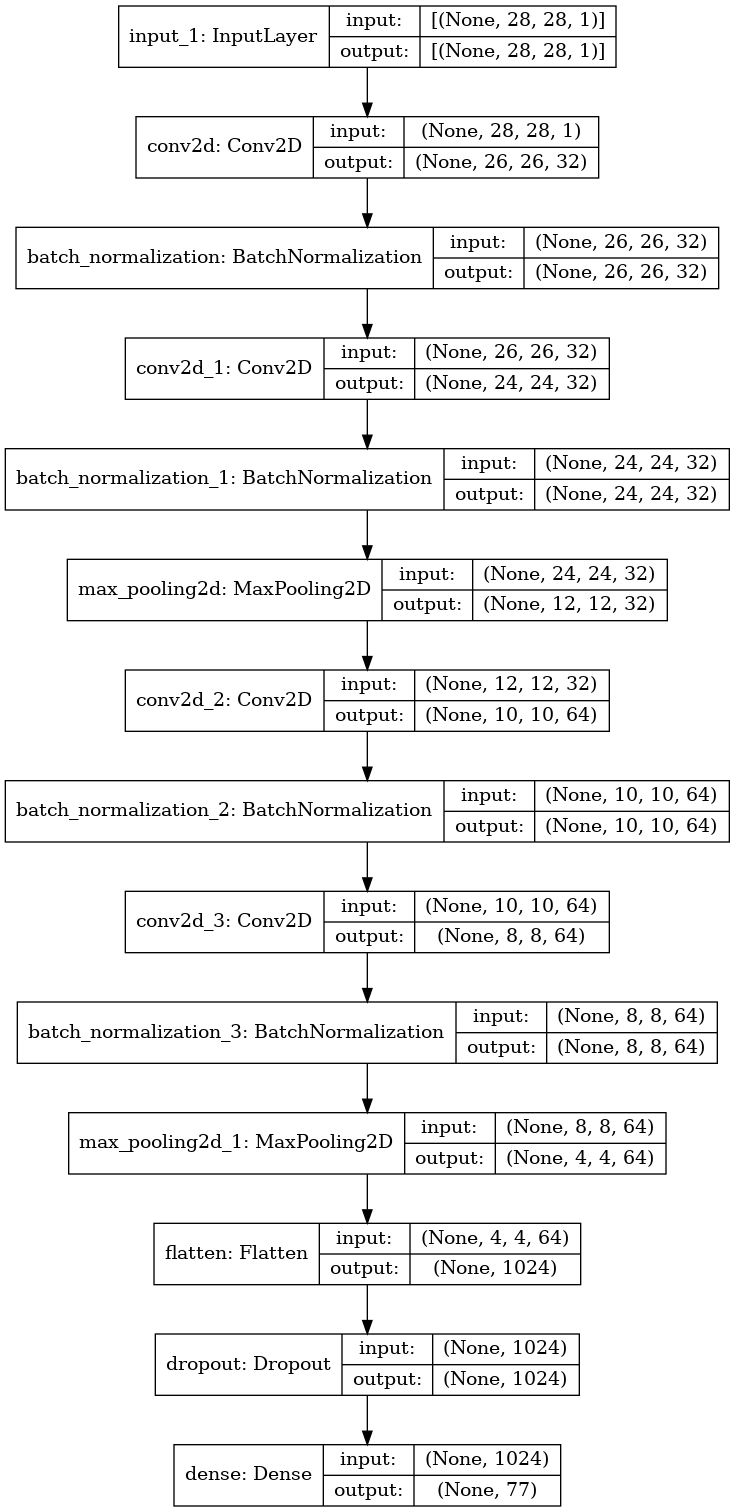

In [12]:
plot_model(model, to_file='/kaggle/working/model_plot.png', show_shapes=True, show_layer_names=True)

# 4. Train model 

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import metrics
import numpy as np

In [14]:
# checkpoint
model_file="/kaggle/working/best_model.hdf5"
bm = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=20)
callbacks_list = [bm, es]


history = model.fit(train_gen,
            validation_data = valid_gen,
            steps_per_epoch = train_gen.n//train_gen.batch_size,
            validation_steps = valid_gen.n//valid_gen.batch_size,
            epochs=5,
            callbacks=callbacks_list)

print('Training stopped')

Epoch 1/5
1710/1710 [==============================] - 38s 22ms/step - loss: 3.2918 - accuracy: 0.2604 - val_loss: 1.9732 - val_accuracy: 0.4189

Epoch 00001: val_accuracy improved from -inf to 0.41893, saving model to /kaggle/working/best_model.hdf5
Epoch 2/5
1710/1710 [==============================] - 38s 22ms/step - loss: 1.7914 - accuracy: 0.4952 - val_loss: 2.1343 - val_accuracy: 0.4340

Epoch 00002: val_accuracy improved from 0.41893 to 0.43396, saving model to /kaggle/working/best_model.hdf5
Epoch 3/5
1710/1710 [==============================] - 39s 23ms/step - loss: 1.4086 - accuracy: 0.5913 - val_loss: 1.6270 - val_accuracy: 0.5596

Epoch 00003: val_accuracy improved from 0.43396 to 0.55955, saving model to /kaggle/working/best_model.hdf5
Epoch 4/5
1710/1710 [==============================] - 40s 23ms/step - loss: 1.2251 - accuracy: 0.6367 - val_loss: 1.5103 - val_accuracy: 0.5755

Epoch 00004: val_accuracy improved from 0.55955 to 0.57547, saving model to /kaggle/working/bes

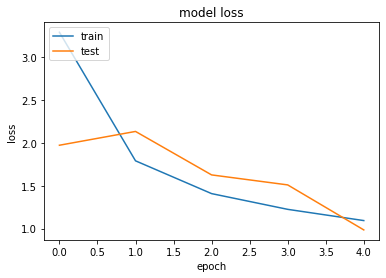

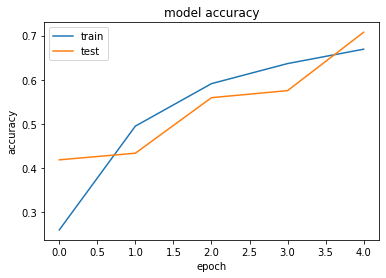

In [15]:
# plot loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 5. Evaluate model

In [16]:
# load best model
json_file = open('/kaggle/working/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
best_model = model_from_json(loaded_model_json)
# load weights into new model
best_model.load_weights("/kaggle/working/best_model.hdf5")
best_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
print("Loaded model from disk")

Loaded model from disk


In [17]:
score = best_model.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

107/107 [==============================] - 3s 25ms/step - loss: 0.9862 - accuracy: 0.6974
Test loss: 0.9861629009246826
Test accuracy: 0.6973606944084167


In [18]:
predict=best_model.predict(valid_gen)
# predict the class label
y_predicted = predict.argmax(axis=-1)

In [19]:
y_actual = valid_gen.labels

In [20]:
confusion_matrix = metrics.confusion_matrix(y_actual, y_predicted)

In [21]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

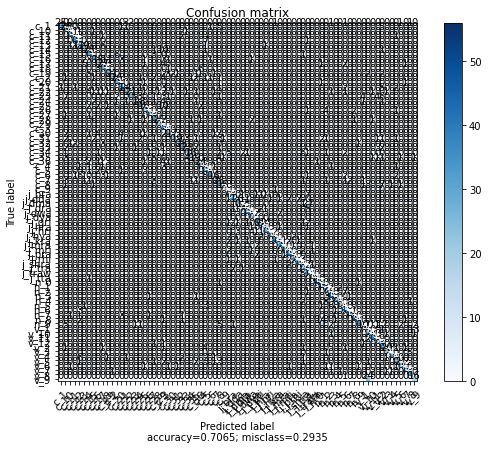

In [22]:
cls_lbl = []

for item in valid_gen.class_indices.items():
    cls_lbl.append(item[0])


plot_confusion_matrix(confusion_matrix,
                          target_names=cls_lbl,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [23]:
print(metrics.classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.61      0.75        41
           1       0.49      0.68      0.57        41
           2       0.90      0.85      0.88        41
           3       0.77      0.83      0.80        41
           4       0.38      0.80      0.52        41
           5       0.59      0.46      0.52        41
           6       0.56      0.68      0.62        41
           7       0.69      0.76      0.72        41
           8       0.52      0.37      0.43        41
           9       0.61      0.66      0.64        41
          10       0.63      0.76      0.69        41
          11       0.95      0.51      0.67        41
          12       0.70      0.63      0.67        41
          13       0.63      0.90      0.74        41
          14       0.80      0.59      0.68        41
          15       0.88      0.51      0.65        41
          16       0.75      0.22      0.34        41
          17       0.76    